In [1]:
import pickle
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [97]:
from dash import html
from jupyter_dash import JupyterDash
import dash
from dash import Dash, dcc, html, Input, Output, callback, State
import dash_bootstrap_components as dbc
import jupyterlab_dash
import dash_leaflet as dl
from dash_leaflet import Map, TileLayer
from dash_extensions.javascript import assign
import re
from dash_extensions.javascript import assign
from dash_leaflet import Map, TileLayer

In [98]:
shops = pd.read_csv('DashBoaredData/ClassifiedShopes.csv')
rent = pd.read_csv('DashBoaredData/rent.csv')

AgeGroupLabor = pd.read_csv('DashBoaredData/AgeGroupLabor.csv')
AgeGroup = pd.read_csv('DashBoaredData/AgeGroup.csv')
RiyadhPop = pd.read_csv('DashBoaredData/RiyadhPop.csv')

DNN = pickle.load(open("SuccLocationDNN.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

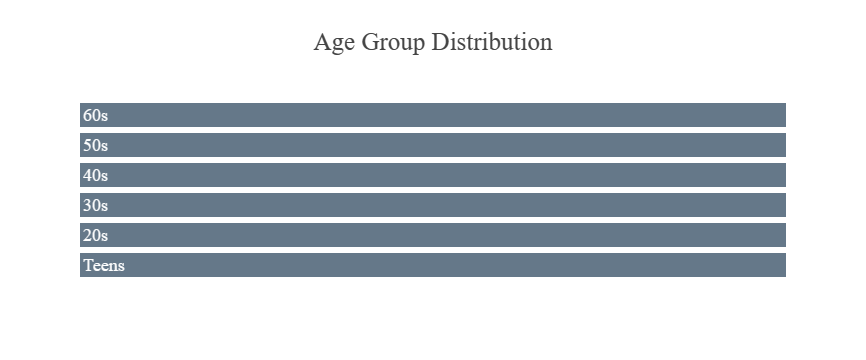

In [162]:
import plotly.graph_objects as go

x = ['Teens','20s', '30s','40s','50s','60s']
y = [100, 100, 100, 100, 100, 100]
p = ['100%','100%', '100%','100%','100%','100%']

agegroup = go.Figure(
        go.Bar(
            x=[40]*6,
            y=x,
            text=p,
            textposition="inside",
            textfont=dict(color="black"),
            orientation="h",
            marker_color="#C7D0D7",
        )
)

agegroup.add_trace(
    go.Bar(
        x=p,
        y=x,
        orientation="h",
        marker_color="#657889",
    )
)
agegroup.update_layout(title = 'Age Group Distribution',
                       barmode="overlay", 
                       showlegend=False,
                       template="presentation",
                       title_font_family="Times New Roman",
                       font_family="Times New Roman",)

agegroup.update_yaxes(
    tickmode="array",
    categoryorder="total ascending",
    tickvals=x,
    ticktext=x,
    ticklabelposition="inside",
    tickfont=dict(color="white"),
)
agegroup.update_xaxes(range=[0, 40], visible=False)

agegroup.show()

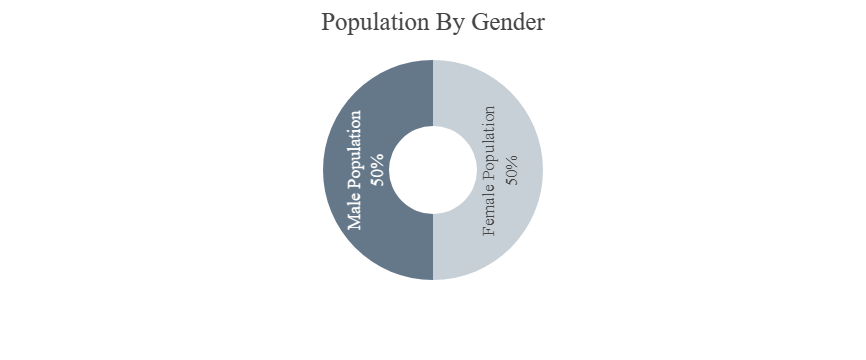

In [168]:
labels = ['Female Population', 'Male Population']
values = [50, 50]

GenderGroup = px.pie(values=values, names=labels,hole=.4, color_discrete_sequence=['#C7D0D7','#657889'])

GenderGroup.update_layout(showlegend=False,title='Population By Gender',
                          template="presentation",
                          title_font_family="Times New Roman",
                          font_family="Times New Roman")

GenderGroup.update_traces(textposition='inside', textinfo='percent+label')
GenderGroup.show()

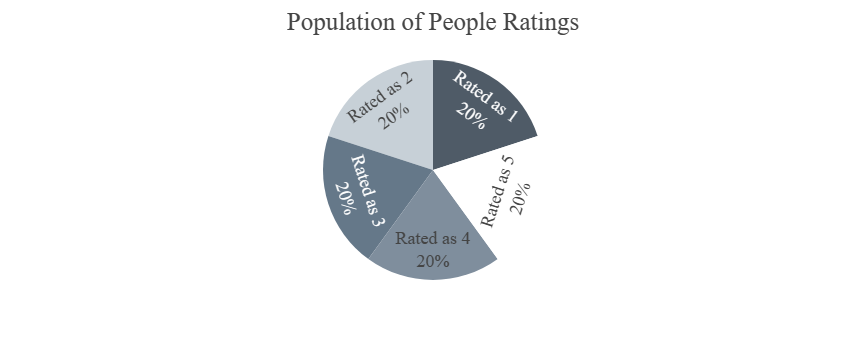

In [172]:
x = ['Rated as 1', 'Rated as 2', 'Rated as 3', 'Rated as 4', 'Rated as 5']
y = [50, 50, 50, 50, 50]

graph1 = px.pie(values=y, names=x, color_discrete_sequence=['#4F5B67','#C7D0D7','#657889'])

graph1.update_layout(showlegend=False,title='Population of People Ratings',
                          template="presentation",
                          title_font_family="Times New Roman",
                          font_family="Times New Roman")

graph1.update_traces(textposition='inside', textinfo='percent+label')
graph1.show()

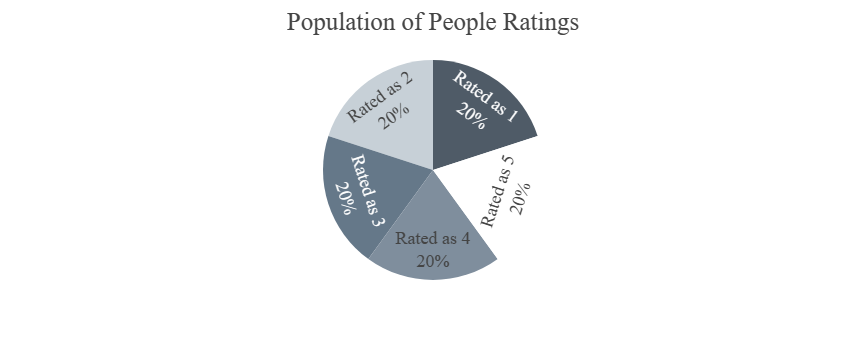

In [171]:
x = ['Rated as 1', 'Rated as 2', 'Rated as 3', 'Rated as 4', 'Rated as 5']
y = [50, 50, 50, 50, 50]

graph2 = px.pie(values=y, names=x, color_discrete_sequence=['#4F5B67','#C7D0D7','#657889'])
graph2.update_layout(showlegend=False,title='Population of People Ratings',
                          template="presentation",
                          title_font_family="Times New Roman",
                          font_family="Times New Roman")

graph2.update_traces(textposition='inside', textinfo='percent+label')
graph2.show()

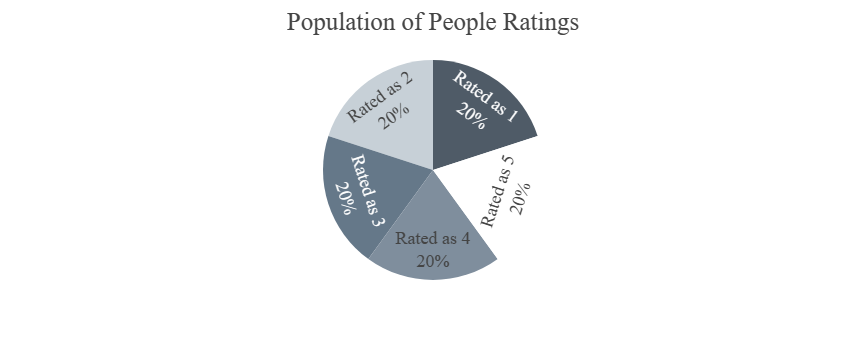

In [173]:
x = ['Rated as 1', 'Rated as 2', 'Rated as 3', 'Rated as 4', 'Rated as 5']
y = [50, 50, 50, 50, 50]

graph3 = px.pie(values=y, names=x, color_discrete_sequence=['#4F5B67','#C7D0D7','#657889'])
graph3.update_layout(showlegend=False,title='Population of People Ratings',
                          template="presentation",
                          title_font_family="Times New Roman",
                          font_family="Times New Roman")

graph3.update_traces(textposition='inside', textinfo='percent+label')
graph3.show()

In [146]:
Style = {"text-align": "center", 'width': '100%', 'display': 'inline-block', 'font-weight': 'bold',
                      'font-family': "Times New Roman", 'color':'#173F3F',
                      'text-shadow': '2px 2px 2px #C7D0D7', 'text-transform': 'none', 'font-size': 40 }

Text_Style ={"text-align": "center", 'width': '100%', 'padding': '5px','color':'black', 'display': 'inline-block',
        'font-size': 20, 'font-family': "Times New Roman", 'text-transform': 'none'}

In [181]:
#map config
url = 'https://tiles.stadiamaps.com/tiles/alidade_smooth_dark/{z}/{x}/{y}{r}.png'
attribution = '&copy; <a href="https://stadiamaps.com/">Stadia Maps</a> '

eventHandlers = dict(
    click=assign("function(e, ctx){ctx.setProps({data: e.latlng.lat +','+ e.latlng.lng})}")
)

app = Dash(
    __name__,
    external_stylesheets = [dbc.themes.LUX, dbc.themes.SPACELAB, dbc.icons.BOOTSTRAP, dbc.themes.BOOTSTRAP])

app.layout = html.Div([
        #map
    dbc.Row([
        dl.Map(children=[dl.TileLayer(url=url, maxZoom=20, attribution=attribution)], eventHandlers=eventHandlers,
            style={'height': '50vh'}, center=[24.616981, 46.731747], zoom=11.5, id='map'),  
    ]),
    ##end of map col 
######################################
    #start of Col1
    dbc.Row([
        dbc.Card(
            dbc.CardBody([
                dbc.Row([
                dbc.Col([
                    dbc.Card([
                        dbc.CardBody([
                            dbc.Row([
                                dbc.Col([
                                    dbc.Card([
                                        dbc.CardBody([html.H1('Choose a Location To display Data', 
                                        id='Prediction',style= Style)])
                                ]),
                                ], width=12),
                        ], align='center'), 
                        html.Br(),
                            
                        dbc.Row([
                            dbc.Col([
                                dbc.Card([
                                    dbc.CardHeader("Amount of Competitors"),
                                    dbc.CardBody([html.H5(id='Competitors',style= Text_Style)]),
                                ]),
                            ], width=6),
                            dbc.Col([
                                dbc.Card([
                                    dbc.CardHeader("Number of Officces Nearby"),
                                    dbc.CardBody([html.H5(id='BusiNum',style= Text_Style)]),
                                ]),
                            ], width=6),
                        ], align='center'), 
                        html.Br(),
                            
                        dbc.Row([
                            dbc.Col([
                                dbc.Card([
                                    dbc.CardHeader("Number of Hotels Nearby"),
                                    dbc.CardBody([html.H5(id='Hotels',style= Text_Style)]),
                                ]),
                            ], width=6),
                            dbc.Col([
                                dbc.Card([
                                    dbc.CardHeader("Number of Parks Nearby"),
                                    dbc.CardBody([html.H5(id='Parks',style= Text_Style)]),
                                ]),
                            ], width=6),
                        ], align='center'), 
                        html.Br(),
                        
                        dbc.Row([
                            dbc.Col([
                                 dbc.Card([
                                    dbc.CardHeader("Avarage Rent in this Area"),
                                    dbc.CardBody([html.H5(id='Rent',style= Text_Style)]),
                                    ]),
                                ], width=12),
                            ], align='center'), 
                            
                            
                        ])])
                ], width=5),
                #html.Br(),
                
                #Graphs here 
                dbc.Col([
                    dbc.Card(
                        dbc.CardBody([
                            dbc.Row([
                                dbc.Col([
                                    dcc.Graph(id='AgeGroupchart', figure = agegroup)
                                ]),
                                dbc.Col([
                                    dcc.Graph(id='GenderGroupchart', figure = GenderGroup)
                                ]),
                            ],style={'height': '70vh'}),
                        ]))
                ], width=7), 
            ]),
        ])
    ),
        ####
    ], align='center'),
    #End of profile Col 

#comp Row 
    dbc.Row([
        dbc.Card([
            dbc.CardBody([
                html.H1('Competitors Profile',style= Style),
                html.H1(id='CompTitle',style= Style),
            ])
        ]),
        dbc.Card(
                dbc.CardBody([
                    dbc.Col([
                       dbc.Row([
                           dbc.Col([
                               dbc.Row([
                                   dbc.Card([
                                        dbc.CardHeader("Name"),
                                        dbc.CardBody([html.H5(id='name1',style= Text_Style)]),
                                    ]),
                               ]),
                               dbc.Row([
                                   dbc.Card([
                                        dbc.CardHeader("Type"),
                                        dbc.CardBody([html.H5(id='type1',style= Text_Style)]),
                                    ]),
                               ]),
                               dbc.Row([
                                   dbc.Card([
                                        dbc.CardHeader("Neighbhood"),
                                        dbc.CardBody([html.H5(id='neig1',style= Text_Style)]),
                                    ]),
                               ]), 
                           ],width=5),
                           dbc.Col([
                               dcc.Graph(id='chart1', figure = graph1),
                           ],width=7),
                       ]),
                    ]),  
            ]),
        ),
        dbc.Card(
                dbc.CardBody([
                    dbc.Col([
                       dbc.Row([
                           dbc.Col([
                               dbc.Row([
                                   dbc.Card([
                                        dbc.CardHeader("Name"),
                                        dbc.CardBody([html.H5(id='name2',style= Text_Style)]),
                                    ]),
                               ]),
                               html.Br(),
                               dbc.Row([
                                   dbc.Card([
                                        dbc.CardHeader("Type"),
                                        dbc.CardBody([html.H5(id='type2',style= Text_Style)]),
                                    ]),
                               ]),
                               html.Br(),
                               dbc.Row([
                                   dbc.Card([
                                        dbc.CardHeader("Neighbhood"),
                                        dbc.CardBody([html.H5(id='neig2',style= Text_Style)]),
                                    ]),
                               ]),
                               html.Br(),
                           ],width=5),
                           dbc.Col([
                               dcc.Graph(id='chart2', figure = graph2),
                           ],width=7),
                       ]),
                    ]),
                ]),
        ),
        dbc.Card(
            dbc.CardBody([
                dbc.Col([
                   dbc.Row([
                       dbc.Col([
                            dbc.Card(
                                dbc.CardBody([
                                       dbc.Row([
                                           dbc.Card([
                                                dbc.CardHeader("Name"),
                                                dbc.CardBody([html.H5(id='name3',style= Text_Style)]),
                                            ]),
                                       ]),
                                       dbc.Row([
                                           dbc.Card([
                                                dbc.CardHeader("Type"),
                                                dbc.CardBody([html.H5(id='type3',style= Text_Style)]),
                                            ]),
                                       ]),
                                       dbc.Row([
                                           dbc.Card([
                                                dbc.CardHeader("Neighbhood"),
                                                dbc.CardBody([html.H5(id='neig3',style= Text_Style)]),
                                            ]),
                                       ]),
                                   ]),
                               ),
                       ],width=5),
                       dbc.Col([
                           dcc.Graph(id='chart3', figure = graph3),
                       ],width=7),
                   ]),
                ]), 
            ]),
        )
        
    ], align='center')

],style={'background-color': '#E0EAF2', 'padding': '10px'})

###Call 
@app.callback(
    Output("map", "children"),
    Output("Prediction", "children"),
    Output("Competitors", "children"),
    Output("BusiNum", "children"),
    Output("Hotels", "children"),
    Output("Parks", "children"),
    Output("Rent", "children"),
    Output("AgeGroupchart", "figure"),
    Output("GenderGroupchart", "figure"),
    Output("CompTitle", "children"),
    
    Output("name1", "children"),
    Output("type1", "children"),
    Output("neig1", "children"),
    Output("chart1", "figure"),
    
    Output("name2", "children"),
    Output("type2", "children"),
    Output("neig2", "children"),
    Output("chart2", "figure"),
    
    Output("name3", "children"),
    Output("type3", "children"),
    Output("neig3", "children"),
    Output("chart3", "figure"),
    
    Input("map", "data"),
)

def Prediction(latlng):
    latlng = re.split(',',latlng)
    lat = float(latlng[0])
    lng = float(latlng[1])

    mapR = Updatemap(lat, lng)
    
    #get ['FemalePop','MalePop','neighbhood_id'] using RiyadhPop Dataset
    df = RiyadhPop[(lat <= RiyadhPop['lat_max']) & (lat >= RiyadhPop['lat_min']) &
                    (lng <= RiyadhPop['lng_max']) &(lng >= RiyadhPop['lng_min'])]
    
    df.reset_index(drop=True, inplace=True)
    
    FemalePop = int((df['FemaleNonSaudi'].sum() + df['FemaleSaudi'].sum())/ (len(df)*2))
    MalePop = int((df['MaleNonSaudi'].sum() + df['MaleSaudi'].sum())/ (len(df)*2))

    
    #Get ['officeNum', 'HotelNum', 'companieNum', 'CompNum'] using Shops Dataset
    maxlat = lat + 0.01500
    minlat = lat - 0.01500
    maxlng = lng + 0.01500
    minlng = lng - 0.01500
    
    df = shops[(shops['lat'] <= maxlat) & (shops['lat'] >= minlat) & (shops['lng'] <= maxlng) & (shops['lng'] >= minlng)]
    df.reset_index(drop=True, inplace=True)

    R = []
    for i in range(len(df)):
        r = abs(lat - df['lat'][i]) + abs(lng - df['lng'][i])
        R.append(r)

    index = np.argmax(R)
    neighbhoodName= df['neighbhood'][index]

    officeNum = 0
    try:
        officeNum = int(df['officeNum'].sum()/ len(df))
    except: 
        pass
        
    HotelNum = 0
    try:
        HotelNum = int(df['HotelNum'].sum()/ len(df))
    except:
        pass

    companieNum = 0
    try:
        companieNum = int(df['companieNum'].sum()/ len(df))
    except:
        pass

    schoolNum = 0 
    try:
        schoolNum = int(df['schoolNum'].sum()/ len(df))
    except:
        pass

    parksNum = 0
    try:
        parksNum = int(df['parksNum'].sum()/ len(df))
    except:
        pass
        
    CompNum = 0
    try: 
        df = df[df['isSuccessful'] == 1]
        competitors = df.copy()
        CompNum = len(df)
    except:
        pass

    #predict succ 
    myData = scaler.transform([[lat,lng, schoolNum, parksNum, officeNum, HotelNum, companieNum, CompNum]])
    Succ = DNN.predict(myData)
    Succ = int(Succ[0][0] * 100)

    #Get Avg Rent Prices in loc 
    df = rent[(rent['location.lat'] <= maxlat) & (rent['location.lat'] >= minlat) & (rent['location.lng'] <= maxlng) & (rent['location.lng'] >= minlng)]
    df.reset_index(drop=True, inplace=True)

    AVGRent = ''
    try:
        AVGRent = int(df['price'].sum()/ len(df))
    except:
        AVGRent = 'Sorry No Data Found'

    busi = companieNum + officeNum
    predic = str('The Success of '+neighbhoodName+ ' Location is ' + str(Succ)+'%')

    Teens = int((FemalePop+MalePop)* (AgeGroup['ratio'][0]/100))
    G20s = int((FemalePop+MalePop)* (AgeGroup['ratio'][1]/100))	
    G30s = int((FemalePop+MalePop)* (AgeGroup['ratio'][2]/100))
    G40s = int((FemalePop+MalePop)* (AgeGroup['ratio'][3]/100))	
    G50s = int((FemalePop+MalePop)* (AgeGroup['ratio'][4]/100))	
    G60s = int((FemalePop+MalePop)* (AgeGroup['ratio'][5]/100))

    sum = Teens+ G20s + G30s + G40s + G50s + G60s
    y = [Teens, G20s, G30s, G40s, G50s, G60s]
    p = []
    for i in y:
        prec = (i/sum)*100
        prec = round(prec, 1)
        prec = str(prec)+'%'
        p.append(prec)

    agegroup = UpdateAgegroup(y,p)
    GenderGroup = UpdateGendergroup([FemalePop, MalePop])
    AVGRent = str(AVGRent)+' SR'

    ##comp Profile 
    Cname1, Cname2, Cname3 = '', '', ''
    Cneig1, Cneig2, Cneig3 = '', '', ''
    Ctype1, Ctype2, Ctype3 = '', '', ''
    Cchart1, Cchart2, Cchart3 = graph1, graph2, graph3
    title = '' 
    
    if len(competitors)>2:
        title = 'Information About Top 3 Competitors'
        competitors = competitors.sort_values(by=['user_ratings_total'], ascending=False)
        df.reset_index(drop=True, inplace=True)
        Cname1, Cname2, Cname3 = competitors['name'][0], competitors['name'][1], competitors['name'][2]
        Cneig1, Cneig2, Cneig3 = competitors['neighbhood'][0], competitors['neighbhood'][1], competitors['neighbhood'][2]
        Ctype1, Ctype2, Ctype3 = competitors['types'][0], competitors['types'][1], competitors['types'][2]
        
        Cchart1 = ratingGraphs([competitors['rated1'][0], competitors['rated2'][0],
                               competitors['rated3'][0], competitors['rated4'][0], competitors['rated5'][0]])  
        
        Cchart2 = ratingGraphs([competitors['rated1'][1], competitors['rated2'][1],
                               competitors['rated3'][1], competitors['rated4'][1], competitors['rated5'][1]]) 
        
        Cchart3 = ratingGraphs([competitors['rated1'][2], competitors['rated2'][2],
                               competitors['rated3'][2], competitors['rated4'][2], competitors['rated5'][2]])
        
    elif len(competitors)>1:
        title = 'Information About Top 2 Competitors'
        competitors = competitors.sort_values(by=['user_ratings_total'], ascending=False)
        df.reset_index(drop=True, inplace=True)
        
        Cname1, Cname2 = competitors['name'][0], competitors['name'][1]
        
        Cneig1, Cneig2 = competitors['neighbhood'][0], competitors['neighbhood'][1]
        
        Ctype1, Ctype2 = competitors['types'][0], competitors['types'][1]
        
        Cchart1 = ratingGraphs([competitors['rated1'][0], competitors['rated2'][0],
                               competitors['rated3'][0], competitors['rated4'][0], competitors['rated5'][0]])  
        
        Cchart2 = ratingGraphs([competitors['rated1'][1], competitors['rated2'][1],
                               competitors['rated3'][1], competitors['rated4'][1], competitors['rated5'][1]]) 

    elif len(competitors)>0:
        title = 'Information About Top Competitor'
        Cname1 = competitors['name'][0]
        
        Cneig1 = competitors['neighbhood'][0]
        
        Ctype1 = competitors['types'][0]
        
        Cchart1 = ratingGraphs([competitors['rated1'][0], competitors['rated2'][0],
                               competitors['rated3'][0], competitors['rated4'][0], competitors['rated5'][0]])  
    else: 
        title = 'Sorry, No Information Found'

    return mapR, predic, CompNum, companieNum, HotelNum, parksNum, AVGRent, agegroup, GenderGroup, title, Cname1, Ctype1, Cneig1, Cchart1, Cname2, Ctype2, Cneig2, Cchart2, Cname3, Ctype3, Cneig3, Cchart3


##update grahs 
def Updatemap(lat, lng):
    center = [lat, lng]
    mapR = dl.Map(children=[dl.TileLayer(url=url, maxZoom=20, attribution=attribution), dl.Circle(center=center, radius=1500)], eventHandlers=eventHandlers,
    style={'height': '50vh'}, center=center, zoom=11.5, id='map'), 
    return mapR
    
def UpdateGendergroup(values):
    labels = ['Female Population', 'Male Population']
    
    GenderGroup = px.pie(values=values, names=labels,hole=.4, color_discrete_sequence=['#C7D0D7','#657889'])
    
    GenderGroup.update_layout(title = 'Population By Gender', showlegend=False, 
                              template="presentation", title_font_family="Times New Roman",
                              font_family="Times New Roman")
    GenderGroup.update_traces(textposition='inside', textinfo='percent+label')
    return GenderGroup
    
    
def UpdateAgegroup(y,p):
    x = ['Teens','20s', '30s','40s','50s','60s']
    agegroup = go.Figure(go.Bar(
            x=[40]*6, y=x, text=y,
            textposition="inside",
            textfont=dict(color="black"),
            orientation="h",
            marker_color="#C7D0D7"))
    agegroup.add_trace(go.Bar(x=p, y=x, orientation="h", marker_color="#657889"))
    
    agegroup.update_layout(title='Age Group Distribution', barmode="overlay", showlegend=False, 
                           template="presentation", title_font_family="Times New Roman",
                           font_family="Times New Roman")
    
    agegroup.update_yaxes(tickmode="array", categoryorder="total ascending", tickvals=x, ticktext=x, ticklabelposition="inside", tickfont=dict(color="white"))
    
    agegroup.update_xaxes(range=[0, 40], visible=False)
    return agegroup

def ratingGraphs(y):
    x = ['Rated as 1', 'Rated as 2', 'Rated as 3', 'Rated as 4', 'Rated as 5']
    
    rate = px.pie(values=y, names=x, color_discrete_sequence=['#4F5B67','#C7D0D7','#657889'])
    rate.update_layout(showlegend=False,title='Population of People Ratings',
                          template="presentation",
                          title_font_family="Times New Roman",
                          font_family="Times New Roman")
    rate.update_traces(textposition='inside', textinfo='percent+label')
    return rate

    
if __name__ == '__main__':
    app.run_server()

[2023-12-14 13:07:22,269] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 56ms/step


[2023-12-14 13:17:11,405] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 69ms/step


[2023-12-14 13:17:39,652] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 44ms/step


[2023-12-14 13:18:07,796] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 50ms/step


[2023-12-14 13:18:39,668] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 65ms/step


[2023-12-14 13:18:45,392] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 50ms/step


[2023-12-14 13:41:10,223] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 33ms/step


[2023-12-14 13:41:23,561] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 50ms/step


[2023-12-14 13:41:38,742] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py", line 3790, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2606, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2630, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 2

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
             

1/1 [==============================] - 0s 60ms/step


[2023-12-14 13:41:45,378] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py", line 3790, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2606, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2630, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
             

1/1 [==============================] - 0s 54ms/step


[2023-12-14 13:41:49,240] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py", line 3790, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2606, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2630, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
             

1/1 [==============================] - 0s 50ms/step


[2023-12-14 13:42:40,316] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\skna1\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^